In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
biometrics_df = pd.read_csv("../1_standarized_biometrics.csv")
biometrics_df.head()

In [7]:
X = biometrics_df[['MicroSiemens', 'HR', 'HRV' ]].values
y = biometrics_df['ArousalMean'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [9]:
# Para poder usar un clasificador, los datos de la variable target deben ser discretos.
#Los convertimos a True-False (Aroused-NotAroused) con el fin de poder entrear un clasificador binario
def map_to_0_and_1(arousal):
    return 0 if arousal < 5 else 1

y_train_aroused = np.array(list(map(map_to_0_and_1, y_train)))
y_test_aroused = np.array(list(map(map_to_0_and_1, y_test)))

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train_aroused)

KNeighborsClassifier()

# Prediction

In [11]:
knn.predict(X[145].reshape(1, -1))

array([0])

# TRAIN Performance Measuring

In [12]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Cross Validation \t")
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))        
        
        res = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
        print("Cross Validation \t")
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [13]:
print_score(knn, X_train, y_train_aroused, X_test, y_test_aroused, train=True)

Train Result:

Accuracy score: 0.8511

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1644
           1       0.77      0.73      0.75       714

    accuracy                           0.85      2358
   macro avg       0.83      0.82      0.82      2358
weighted avg       0.85      0.85      0.85      2358


Confusion Matrix: 
 [[1488  156]
 [ 195  519]]

Cross Validation 	
Average Accuracy: 	 0.5856
Accuracy SD: 		 0.0862


In [14]:
print_score(knn, X_train, y_train_aroused, X_test, y_test_aroused, train=False)

Test Result:

accuracy score: 0.5814

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       397
           1       0.32      0.26      0.29       193

    accuracy                           0.58       590
   macro avg       0.50      0.50      0.50       590
weighted avg       0.56      0.58      0.57       590


Confusion Matrix: 
 [[293 104]
 [143  50]]

Cross Validation 	
Average Accuracy: 	 0.6339
Accuracy SD: 		 0.1045


# Grid Search

In [15]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [16]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [17]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1)

In [18]:
grid_search_cv.fit(X_train, y_train_aroused)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [19]:
grid_search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [20]:
y_test_pred_grid = grid_search_cv.predict(X_test)

In [21]:
print_score(grid_search_cv, X_train, y_train_aroused, X_test, y_test_aroused, train=True)

Train Result:

Accuracy score: 0.8787

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1644
           1       1.00      0.60      0.75       714

    accuracy                           0.88      2358
   macro avg       0.93      0.80      0.83      2358
weighted avg       0.90      0.88      0.87      2358


Confusion Matrix: 
 [[1644    0]
 [ 286  428]]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cross Validation 	
Average Accuracy: 	 0.6298
Accuracy SD: 		 0.0581


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [22]:
print_score(grid_search_cv, X_train, y_train_aroused, X_test, y_test_aroused, train=False)

Test Result:

accuracy score: 0.6254

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.85      0.75       397
           1       0.35      0.17      0.22       193

    accuracy                           0.63       590
   macro avg       0.51      0.51      0.49       590
weighted avg       0.57      0.63      0.58       590


Confusion Matrix: 
 [[337  60]
 [161  32]]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cross Validation 	
Average Accuracy: 	 0.6729
Accuracy SD: 		 0.0916


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [23]:
grid_search_cv.best_params_

{'n_neighbors': 2}

In [24]:
# grid_search_cv.cv_results_['mean_train_score']

In [25]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00147572, 0.00175734, 0.00147738, 0.00141754, 0.0022428 ,
        0.00159802, 0.00150404, 0.00126724, 0.00121751, 0.00113802]),
 'std_fit_time': array([2.82662697e-05, 1.69410948e-04, 1.56431850e-04, 6.12158633e-05,
        1.24134522e-03, 6.39986981e-04, 4.65278206e-04, 1.65832652e-04,
        3.68791543e-05, 1.79212216e-04]),
 'mean_score_time': array([0.02369657, 0.02992158, 0.0285965 , 0.03004518, 0.02930717,
        0.02639184, 0.02510695, 0.0257812 , 0.022048  , 0.0173768 ]),
 'std_score_time': array([0.00095419, 0.00165491, 0.00046619, 0.00184754, 0.00256185,
        0.00196071, 0.00105358, 0.00275702, 0.00127827, 0.00107999]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 

In [26]:
df_y_train = pd.DataFrame(data=y_test_aroused, columns=['Arousal'])
df_y_pred = pd.DataFrame(data=y_test_pred_grid, columns=['Arousal'])

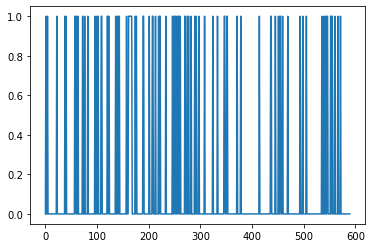

In [27]:
plt.plot(df_y_pred["Arousal"])
plt.show()

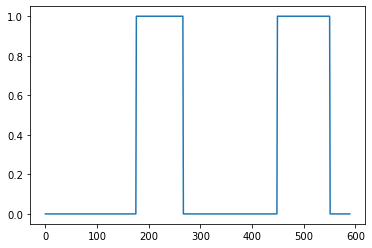

In [28]:
plt.plot(df_y_train["Arousal"])
plt.show()

In [29]:
import pickle

# save the model to disk
pickle.dump(grid_search_cv, open('../models/knn-hr-skin-model', 'wb'))
print('Done')

Done
